<div align='left'>
    <h1 style="color: #FFA500; font-size: 36px; font-weight: bold;">[LAB 05] SỰ PHÂN TÍCH NHÓM</h1>
</div>

> **Sinh viên:** Nguyễn Công Hoài Nam  
> **Mã số sinh viên:** 21280099

## **Thuật toán K-means**

### **Tiền xử lý**

Tạo file `data.csv` 

Đọc dữ liệu từ file

In [426]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

blobs = pd.read_csv('data.csv')
colnames = list(blobs.columns[1:-1])

In [427]:
blobs.head()

,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


Chúng ta sẽ sử dụng cột phân cụm để hiển thị các nhóm khác nhau được biểu diễn trong tập dữ liệu

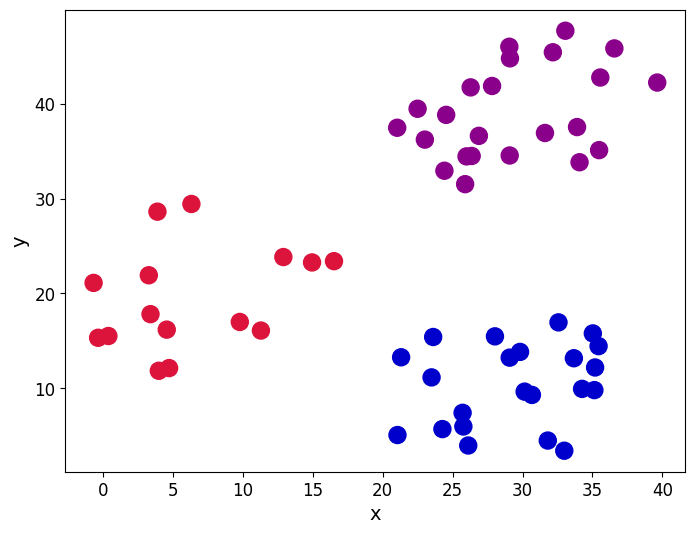

In [428]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x = blobs['x'], y = blobs['y'], s=150, 
            c=blobs['cluster'].astype('category'),
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize = 14)
ax.set_ylabel(r'y', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

### **Các bước**

#### **Bước 1 và 2**: Xác định `k` và khởi tạo các tâm


In [429]:
def initiate_centroids(k, dset):
    '''
    select k data points as centroids
    k: number of centroids
    dset: pandas dateframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k = 3
df = blobs[['x', 'y']]
centroids = initiate_centroids(k,df)
centroids

,x,y
0,24.412,32.932
5,25.893,31.515
36,26.878,36.609


#### **Bước 3**: tính khoảng cách


$Dist(a,b) = \sum (a-b)^2$ với $a,b$ là các điểm dữ liệu

In [430]:
def rsserr(a,b):
    '''
    Calculate sum of squared errors.
    a and b are numpy arrays
    '''
    return np.sum(np.square(a-b))

Ví dụ

In [431]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 19.60
Error for centroid 1: 26.92
Error for centroid 2: 0.00


#### **Bước 4**: gán giá trị các tâm


In [432]:
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid. 
    - dset - pandas dataframe with observations
    - centroids - pandas dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

Thêm cột gán tâm và sai số phát sinh để cập nhật biểu đồ phân tán biểu diễn các trọng tâm

In [433]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

C:\Users\hnam\AppData\Local\Temp\ipykernel_16264\3199595029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


,x,y,centroid,error
0,24.412,32.932,0,0.000000
1,35.190,12.189,1,459.928485
2,26.288,41.718,2,26.449981
3,0.376,15.506,0,881.394772
4,26.116,3.963,1,759.162433


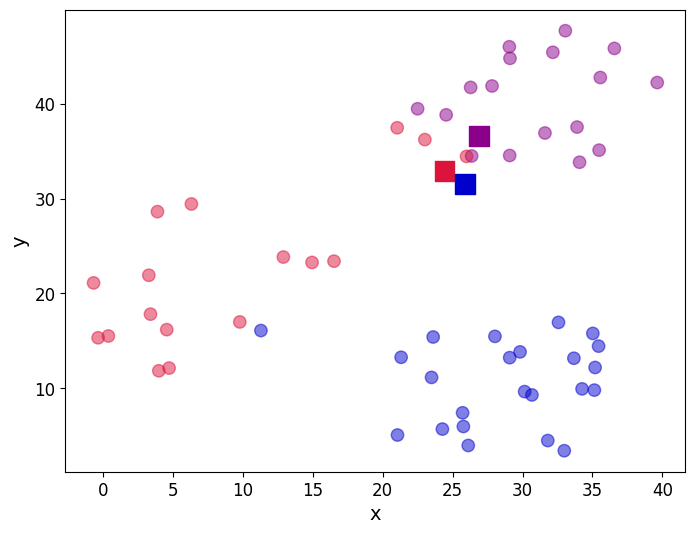

In [434]:
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], marker = 'o', 
           c=df['centroid'].astype('category'),
           cmap = customcmap, s=80, alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], 
            marker = 's', s= 200, c=[0, 1, 2],
           cmap = customcmap)
ax.set_xlabel(r'x', fontsize = 14)
ax.set_ylabel(r'y', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Tổng các sai số


In [435]:
print('The total error is {0:.2f}'.format(df['error'].sum()))

The total error is 20606.25


#### **Bước 5**: cập nhật vị trí của k tâm bằng việc tính giá trị trung bình của các quan sát được gán cho mỗi tâm

In [436]:
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

,x,y
0,9.889444,23.242611
1,28.431250,11.546250
2,30.759333,40.311167


Xem lại biểu đồ phân tán với vị trí của k tâm đã được cập nhật


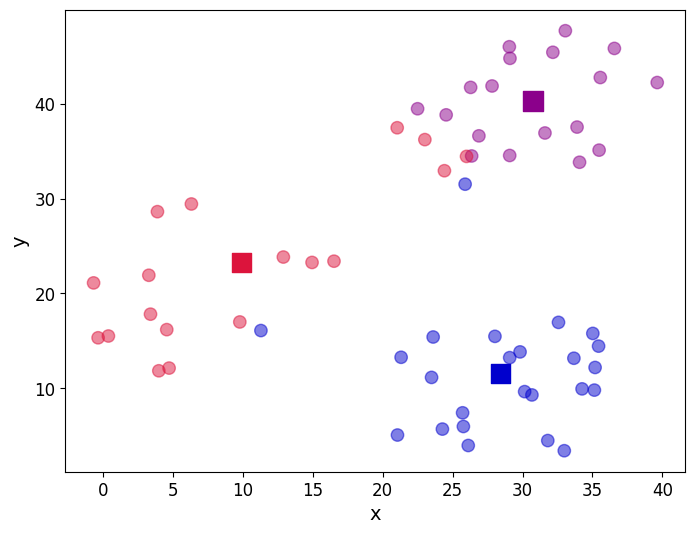

In [437]:
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], marker = 'o', 
           c=df['centroid'].astype('category'),
           cmap = customcmap, s=80, alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], 
            marker = 's', s= 200, c=[0, 1, 2],
           cmap = customcmap)
ax.set_xlabel(r'x', fontsize = 14)
ax.set_ylabel(r'y', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

#### **Bước 6**: lặp lại bước 3-5


In [438]:
def kmeans(dset, k=2, tol=1e-4):
    '''
    K-means implementationd for a 
    `dset`:  DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    # Let us work in a copy, so we don't mess the original
    working_dset = dset.copy()
    # We define some variables to hold the error, the 
    # stopping signal and a counter for the iterations
    err = []
    goahead = True
    j = 0
    
    # Step 2: Initiate clusters by defining centroids 
    centroids = initiate_centroids(k, dset)

    while(goahead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids) 
        err.append(sum(j_err))
        
        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

### **Kết quả**

Thực thi hàm trên


In [439]:
np.random.seed(42)
df['centroid'], df['error'], centroid = kmeans(df[['x','y']], 3)
df.head()

,x,y,centroid,error
0,24.412,32.932,2,61.380524
1,35.190,12.189,1,37.472641
2,26.288,41.718,2,16.216075
3,0.376,15.506,0,51.798518
4,26.116,3.963,1,52.157062


Vị trí của các tâm cuối cùng


In [440]:
centroids

,x,y
0,9.889444,23.242611
1,28.431250,11.546250
2,30.759333,40.311167


Xem lại biểu đồ phân tán


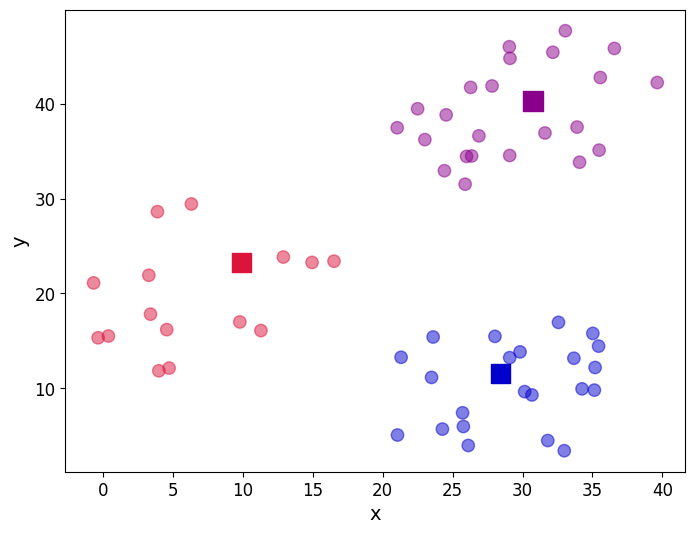

In [441]:
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], marker = 'o', 
           c=df['centroid'].astype('category'),
           cmap = customcmap, s=80, alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], 
            marker = 's', s= 200, c=[0, 1, 2],
           cmap = customcmap)
ax.set_xlabel(r'x', fontsize = 14)
ax.set_ylabel(r'y', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Sử dụng `elbow` để chỉ ra số cụm tối ưu


In [442]:
err_total = []
n = 10
df_elbow = blobs[['x','y']]
for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))

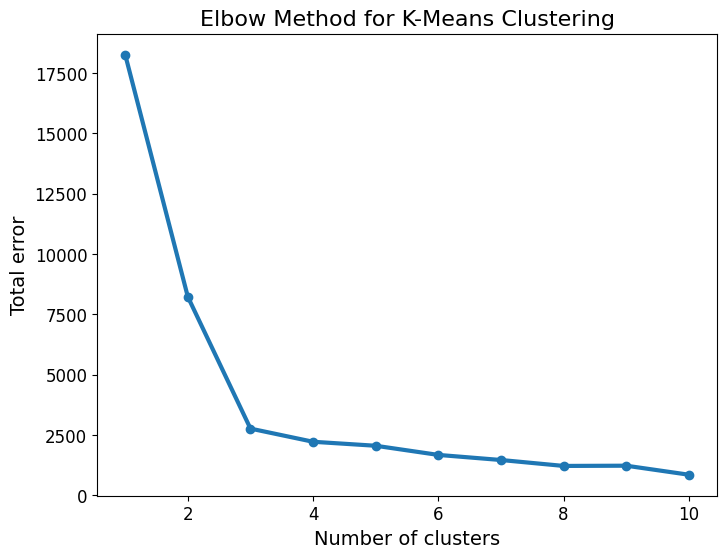

In [443]:
fig, ax = plt.subplots(figsize = (8,6))
plt.plot(range(1,n+1), err_total, linewidth =3, marker = 'o')
ax.set_xlabel(r'Number of clusters', fontsize = 14)
ax.set_ylabel(r'Total error', fontsize = 14)
ax.set_title('Elbow Method for K-Means Clustering', fontsize=16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## **Thuật toán K-Medians**

### **Cài đặt thuật toán**

Lấy ngẫu nhiên trọng tâm ban đầu, tương tự như với hàm `inititate_means` của `kmeans`

In [444]:
def initiate_medians(k, dset):
    '''
    select k data points as medians
    k: number of medians
    dset: pandas dateframe
    '''
    centroids = dset.sample(k)
    return centroids

Hàm tính khoảng cách, khác với `kmeans`, `kmedians` sử dụng khoảng cách `Manhattan`

$Dist(a,b) = \sum |a-b|$ với $a,b$ là các điểm dữ liệu

In [445]:
def rsserr(a,b):
    '''
    Calculate sum of squared errors.
    a and b are numpy arrays
    '''
    return np.sum(np.abs((a-b))) 

Gán các giá trị tâm, tương tự `kmeans`

In [446]:
def median_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `medians`, we assign each
    data point in `dset` to a median. 
    - dset - pandas dataframe with observations
    - medians - pandas dataframe with medians
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        assignation.append(nearest_centroid) 
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

Khác với `kmeans`, `kmedians` sử dụng `trung vị (median)` để tính lại các `centroid`

In [447]:
def kmedians(dset, k=2, tol=1e-4):
    working_dset = dset.copy()
    err = []
    goahead = True
    j = 0
    centroids = initiate_medians(k, working_dset)

    while goahead:
        working_dset['centroid'], j_err = median_assignation(working_dset.iloc[:, :2], centroids)
        err.append(sum(j_err))
        centroids = working_dset.groupby('centroid').agg('median').reset_index(drop=True)

        if j > 0:
            if err[j-1] - err[j] <= tol:
                goahead = False
        j += 1

    return working_dset['centroid'], j_err, centroids

### **Kết quả**

Kết quả hàm

In [448]:
np.random.seed(42)
df['centroid'], df['error'], centroids = kmedians(df[['x','y']], 3)
print('The total error is {0:.2f}'.format(df['error'].sum()))
df.head()

The total error is 486.99


,x,y,centroid,error
0,24.412,32.932,2,9.2470
1,35.190,12.189,1,6.8565
2,26.288,41.718,2,6.9510
3,0.376,15.506,0,6.4780
4,26.116,3.963,1,10.4435


Vẽ biểu đồ để trực quan kết quả vừa tìm được

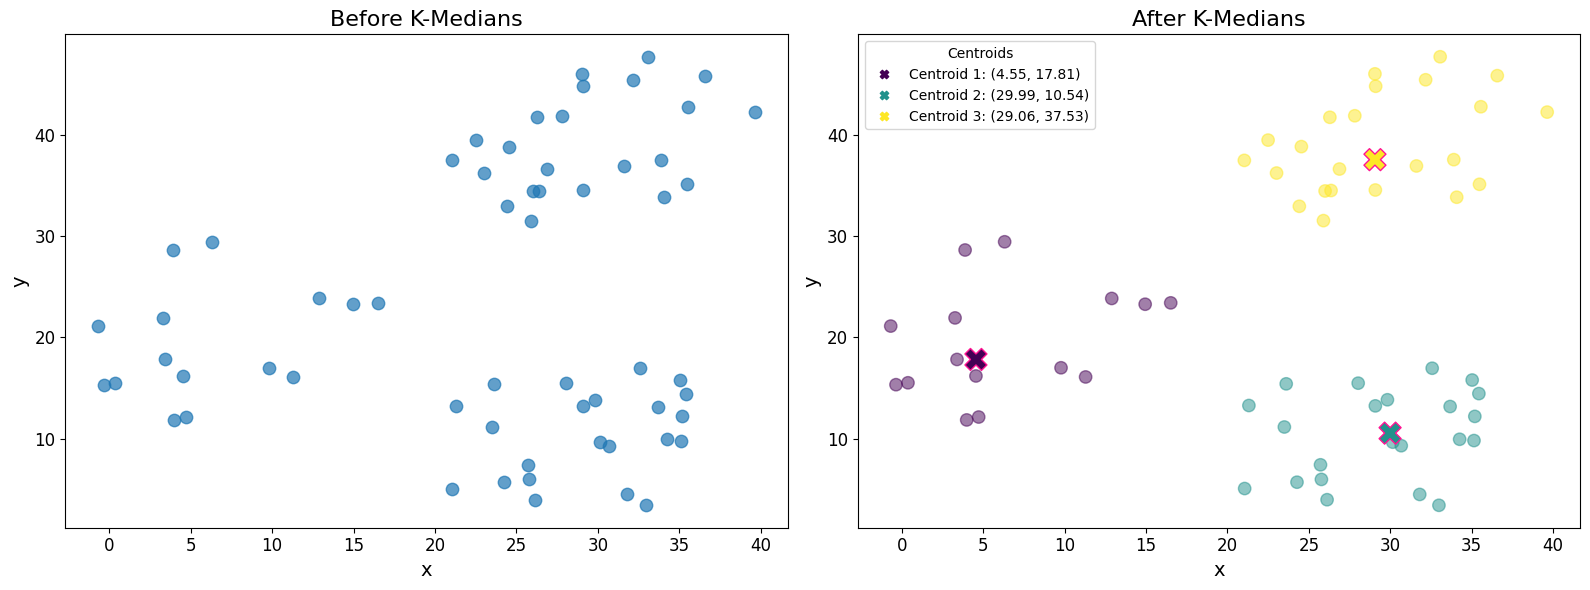

In [462]:
def plot_kmedians(df, centroids):
    k = centroids.shape[0]
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o', s=80, alpha=0.7)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.title('Before K-Medians', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.subplot(1, 2, 2)
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o', c=df['centroid'].astype('category'), cmap='viridis', s=80, alpha=0.5)
    scatter_centroids = plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='X', s=250, c=[i for i in range(k)], cmap='viridis', edgecolors='deeppink')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.title('After K-Medians', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    legend_labels = [f'Centroid {i+1}: ({centroids.iloc[i, 0]:.2f}, {centroids.iloc[i, 1]:.2f})' for i in range(k)]
    legend_elements = scatter_centroids.legend_elements()[0]
    plt.legend(legend_elements, legend_labels, title='Centroids', loc='upper left')

    plt.tight_layout()
    plt.show()


plot_kmedians(df, centroids)


Cùng khám phá biểu đồ `elbow` để chọn số `cluster` thích hợp

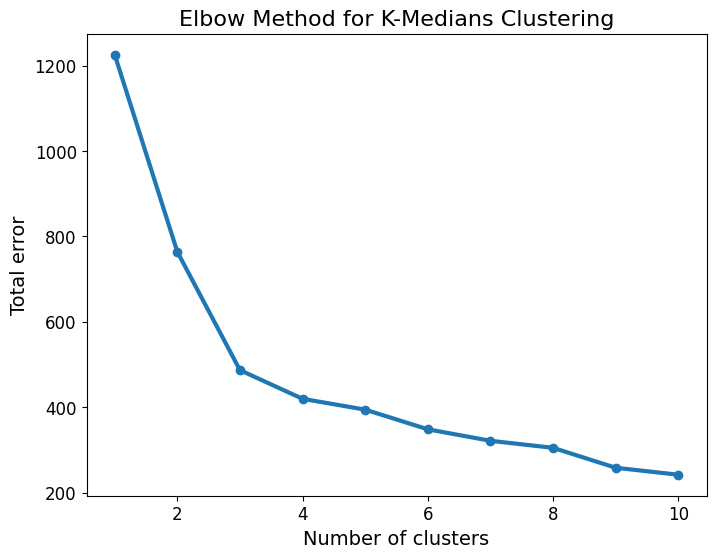

In [450]:
err_total=[]
n = 10
df_elbow=blobs[['x','y']]
for i in range(n):
    _,my_errs,_= kmedians(df_elbow,k=i+1)
    err_total.append(sum(my_errs))

fig,ax=plt.subplots(figsize=(8,6))
plt.plot(range(1,n+1),err_total,linewidth=3,marker='o')
ax.set_xlabel(r'Number of clusters',fontsize=14)
ax.set_ylabel(r'Total error',fontsize=14)
ax.set_title('Elbow Method for K-Medians Clustering', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

=> 3 cluster là thích hợp